In [1]:
import numpy as np 
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)


import time


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load data
f = "GHISACONUS_2008_001_speclib.csv" #data file
df = pd.read_csv(f)

In [3]:
# exploratory data analysis

In [4]:
df.head()

UniqueID Country  AEZ                          Image  Month  Year   jd  \
0      1466     USA    7  EO1H0440332012234110KD_SGS_01      8  2012  234   
1      1467     USA    7  EO1H0440332012234110KD_SGS_01      8  2012  234   
2      1469     USA    7  EO1H0440332012234110KD_SGS_01      8  2012  234   
3      1470     USA    7  EO1H0440332012234110KD_SGS_01      8  2012  234   
4      1476     USA    7  EO1H0440332012234110KD_SGS_01      8  2012  234   

         long        lat  Crop  ...     X2254     X2264     X2274     X2285  \
0 -121.663419  38.534516  corn  ...  8.432855  8.438398  8.585301  8.164735   
1 -121.671589  38.504744  corn  ...  8.682515  8.942595  9.179517  8.744633   
2 -121.597588  38.614056  corn  ...  6.841276  6.276240  6.150597  6.114164   
3 -121.687293  38.571702  corn  ...  6.679967  6.534779  6.430438  6.080465   
4 -121.625189  38.572225  rice  ...  5.256362  5.022666  4.988447  5.220789   

      X2295     X2305     X2315     X2325     X2335     X2345  
0  7.882625  7.380592  7.327904  6.881876  6.616288  6.346634  
1  8.510454  8.090403  7.894839  7.263033  6.536649  5.663291  
2  5.934033  5.116303  4.833205  4.817732  4.652525  3.790456  
3  6.201545  6.291307  6.922908  6.943876  6.461839  5.696439  
4  5.726055  6.007986  4.820400  3.084297  1.322807  1.087548  

[5 rows x 142 columns]

In [5]:
# number of spectra in the file
df.shape[0]

6988

In [6]:
# not wavelength columns
for c in df.columns:
    if c[0]!='X': print(c)

UniqueID
Country
AEZ
Image
Month
Year
jd
long
lat
Crop
Stage


In [7]:
# unique crops
df["Crop"].unique()

array(['corn', 'rice', 'cotton', 'soybean', 'winter_wheat'], dtype=object)

In [8]:
# unique stages
df["Stage"].unique()

array(['Critical', 'Early_Mid', 'Late', 'Mature_Senesc', 'Harvest',
       'Emerge_VEarly'], dtype=object)

In [9]:
# wavelength columns
wl_list = []

for c in df.columns:
    if c[0]=='X': wl_list.append(c)

In [10]:
# wavelength array in nm
wl = np.array([])

for c in df.columns:
    if c[0]=='X': wl = np.append(wl,int(c[1:]))
wl

array([ 437.,  447.,  457.,  468.,  478.,  488.,  498.,  508.,  518.,
        529.,  539.,  549.,  559.,  569.,  579.,  590.,  600.,  610.,
        620.,  630.,  641.,  651.,  661.,  671.,  681.,  691.,  702.,
        712.,  722.,  732.,  742.,  752.,  763.,  773.,  783.,  793.,
        803.,  813.,  824.,  834.,  844.,  854.,  864.,  875.,  885.,
        895.,  905.,  912.,  915.,  923.,  983.,  993., 1003., 1013.,
       1023., 1033., 1044., 1054., 1064., 1074., 1084., 1094., 1175.,
       1185., 1195., 1205., 1215., 1225., 1235., 1245., 1255., 1266.,
       1276., 1286., 1296., 1306., 1316., 1518., 1528., 1538., 1548.,
       1558., 1568., 1578., 1588., 1599., 1609., 1619., 1629., 1639.,
       1649., 1659., 1669., 1679., 1689., 1699., 1710., 1720., 1730.,
       1740., 1750., 1760., 2063., 2073., 2083., 2093., 2103., 2113.,
       2123., 2133., 2143., 2153., 2163., 2174., 2184., 2194., 2204.,
       2214., 2224., 2234., 2244., 2254., 2264., 2274., 2285., 2295.,
       2305., 2315.,

# Winter wheat

In [11]:
# winter wheat
df_winter_wheat = df[df["Crop"] == 'winter_wheat']
df_winter_wheat.shape[0]

1341

In [12]:
df_winter_wheat["Stage"].unique()

array(['Mature_Senesc', 'Emerge_VEarly', 'Critical', 'Late'], dtype=object)

In [13]:
spectra = df_winter_wheat[wl_list].transpose()
spectra["Wavelength, nm"] = wl

12.066781282424927  s


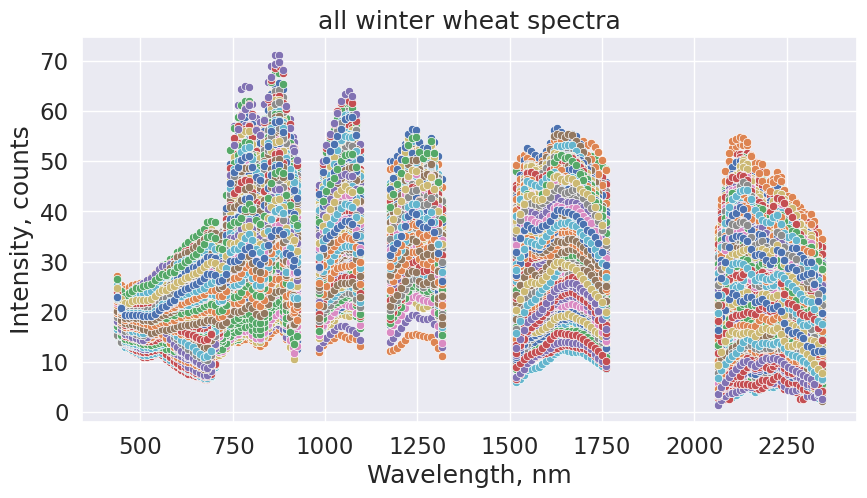

In [14]:
# plot all winter wheat spectra

tic = time.time()
plt.figure(figsize = (10,5))
plt.title("all winter wheat spectra")

for i in df_winter_wheat.index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')
    
   

3.765749216079712  s


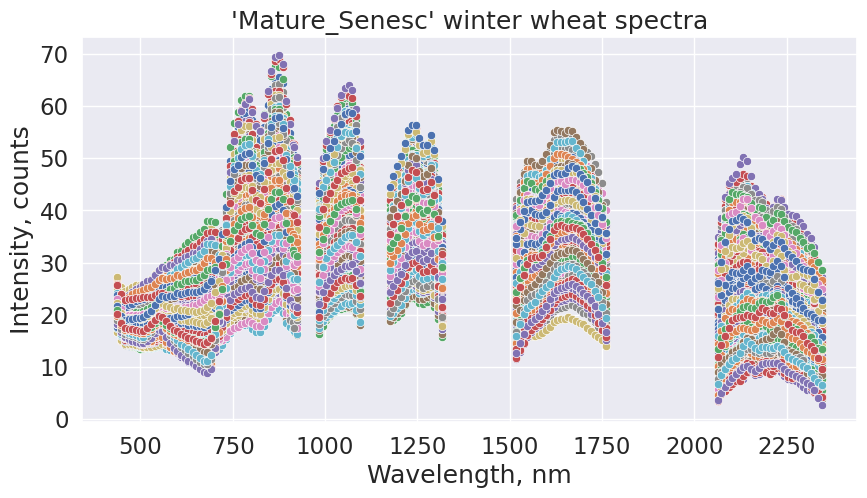

In [15]:
# plot 'Mature_Senesc' winter wheat spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Mature_Senesc' winter wheat spectra")

for i in df_winter_wheat[df_winter_wheat["Stage"] == 'Mature_Senesc'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')

5.998671770095825  s


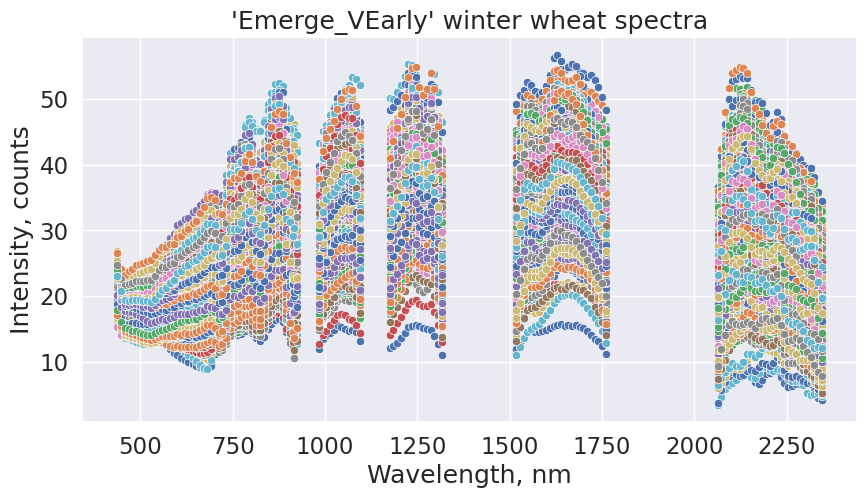

In [16]:
# plot 'Emerge_VEarly' winter wheat spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Emerge_VEarly' winter wheat spectra")

for i in df_winter_wheat[df_winter_wheat["Stage"] == 'Emerge_VEarly'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')

0.502556324005127  s


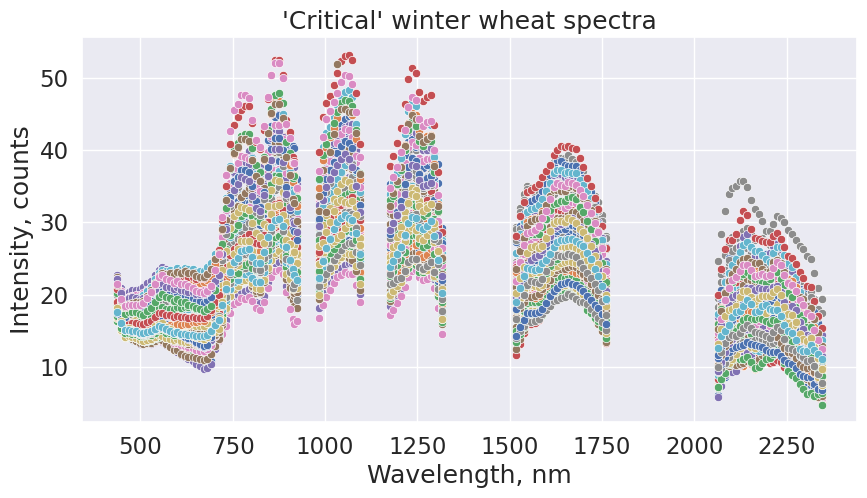

In [17]:
# plot 'Critical' winter wheat spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Critical' winter wheat spectra")

for i in df_winter_wheat[df_winter_wheat["Stage"] == 'Critical'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')

0.4877462387084961  s


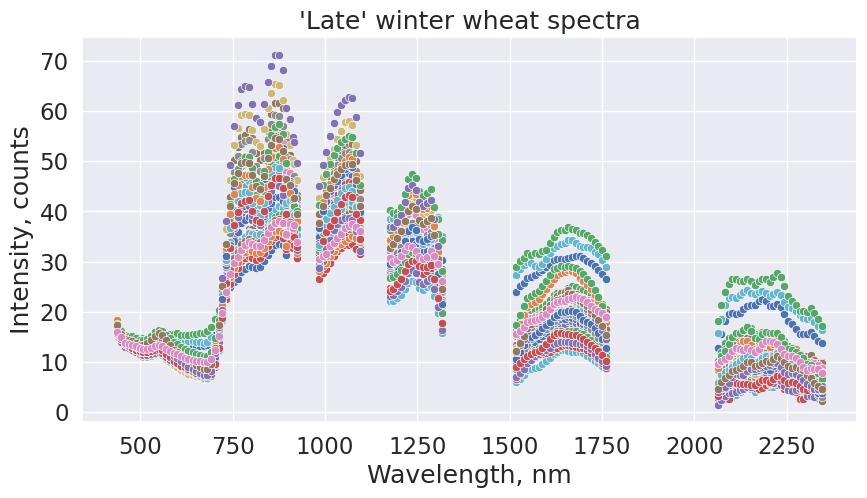

In [18]:
# plot 'Late' winter wheat spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Late' winter wheat spectra")

for i in df_winter_wheat[df_winter_wheat["Stage"] == 'Late'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')

In [19]:
# min max normalization
spectra_n = spectra.copy()
for c in spectra_n.columns:
    if c!= 'Wavelength, nm':
        spectra_n[c]-= spectra_n[c].min()
        spectra_n[c]/= spectra_n[c].max()

In [20]:
df1 = spectra_n.drop(columns = "Wavelength, nm")
df1 = df1.transpose()

df1.head()
df1["Stage"] = df_winter_wheat["Stage"]

df1.head()

X437      X447      X457      X468      X478      X488      X498  \
425  0.298685  0.246990  0.218009  0.215003  0.210698  0.206495  0.201803   
426  0.413437  0.344449  0.309603  0.308488  0.302869  0.296227  0.290388   
427  0.259518  0.218296  0.193218  0.191686  0.187490  0.182244  0.176085   
428  0.159920  0.114679  0.091403  0.101809  0.113118  0.124069  0.135424   
429  0.329164  0.273894  0.242670  0.234672  0.224826  0.217989  0.216780   

         X508      X518      X529  ...     X2264     X2274     X2285  \
425  0.204477  0.218221  0.236496  ...  0.113646  0.106795  0.090702   
426  0.289709  0.303083  0.316988  ...  0.123921  0.098557  0.092117   
427  0.177633  0.191140  0.207961  ...  0.088393  0.089847  0.063363   
428  0.146223  0.164658  0.181817  ...  0.236441  0.209384  0.183938   
429  0.223420  0.245199  0.270575  ...  0.151533  0.144305  0.113723   

        X2295     X2305     X2315     X2325     X2335     X2345          Stage  
425  0.073479  0.049250  0.047984  0.031424  0.020885  0.000000  Mature_Senesc  
426  0.093987  0.075415  0.066224  0.039182  0.019793  0.000000  Mature_Senesc  
427  0.062460  0.063224  0.056221  0.015673  0.000000  0.006074  Mature_Senesc  
428  0.179754  0.151269  0.140133  0.082487  0.033937  0.000000  Mature_Senesc  
429  0.094936  0.066236  0.059206  0.027658  0.008852  0.000000  Mature_Senesc  

[5 rows x 132 columns]

In [21]:
#machine learning

In [22]:
X = df1[wl_list]

In [23]:
y = df1["Stage"]

In [24]:
X = StandardScaler().fit_transform(X)

In [25]:
pca = PCA(n_components=2)

In [26]:
pc = pca.fit_transform(X)

In [27]:
df_pc = pd.DataFrame(data = pc, columns = ['PC 1', 'PC 2'])

In [28]:
df_pc = pd.concat([df_pc, y.reset_index()], axis = 1)
df_pc.drop(columns = 'index', inplace = True)

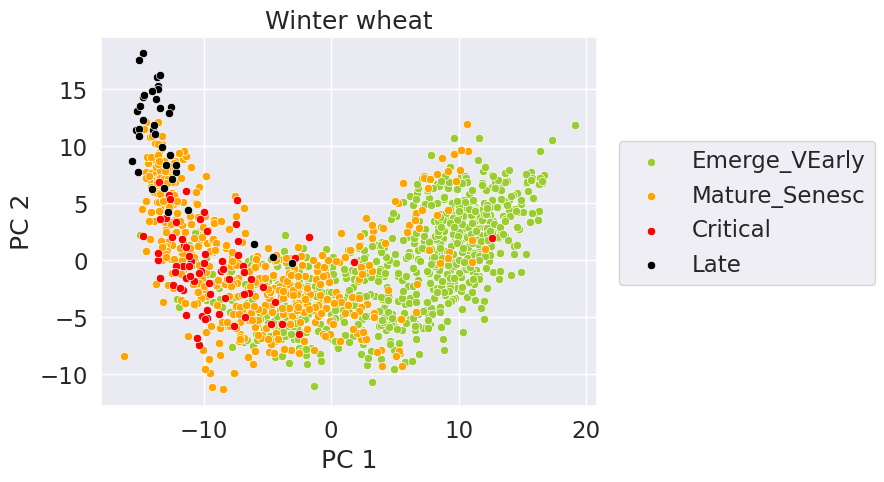

In [29]:
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Emerge_VEarly'], x = "PC 1", y = 'PC 2', color = 'yellowgreen', label = 'Emerge_VEarly')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Mature_Senesc'], x = "PC 1", y = 'PC 2', color = 'orange', label = 'Mature_Senesc')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Critical'], x = "PC 1", y = 'PC 2', color = 'red', label = 'Critical')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Late'], x = "PC 1", y = 'PC 2', color = 'black', label = 'Late')
plt.title("Winter wheat")
plt.legend(bbox_to_anchor=(1.02, 0.75))

# Corn

In [30]:
# corn
df_corn = df[df["Crop"] == 'corn']
df_corn.shape[0]

2622

In [31]:
df_corn["Stage"].unique()

array(['Critical', 'Harvest', 'Emerge_VEarly', 'Late', 'Mature_Senesc',
       'Early_Mid'], dtype=object)

In [32]:
spectra = df_corn[wl_list].transpose()
spectra["Wavelength, nm"] = wl

33.71795320510864  s


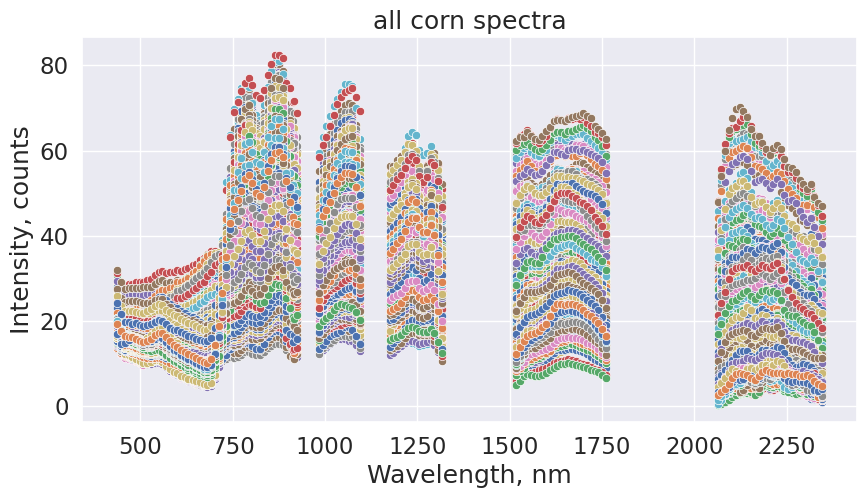

In [33]:
# plot all corn spectra

tic = time.time()
plt.figure(figsize = (10,5))
plt.title("all corn spectra")

for i in df_corn.index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')
    

6.84243106842041  s


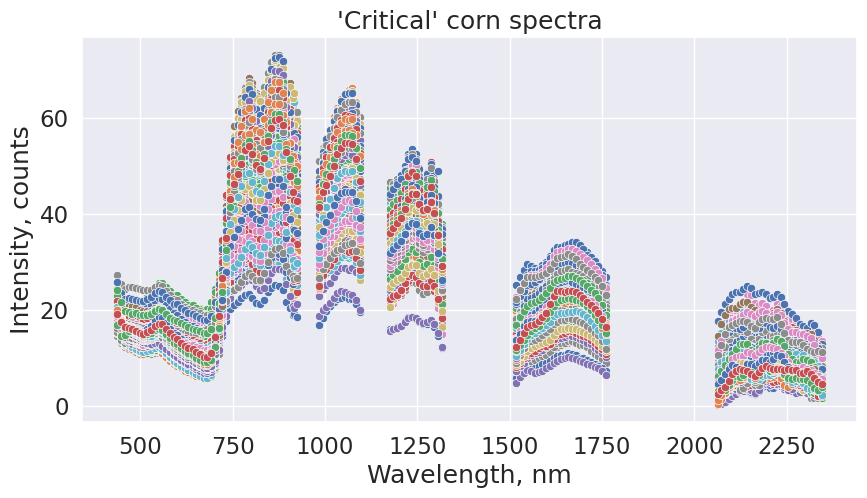

In [34]:
# plot 'Critical' corn spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Critical' corn spectra")

for i in df_corn[df_corn["Stage"] == 'Critical'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')

0.8156189918518066  s


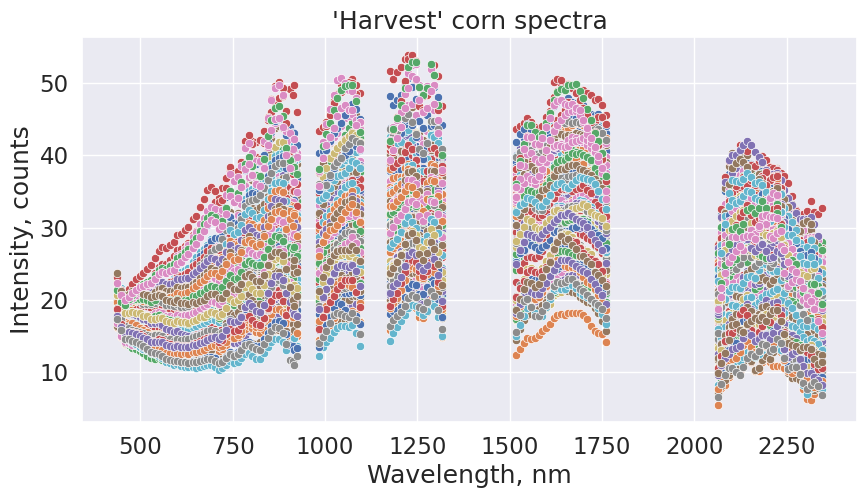

In [35]:
# plot 'Harvest' corn spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Harvest' corn spectra")

for i in df_corn[df_corn["Stage"] == 'Harvest'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')    

1.27085280418396  s


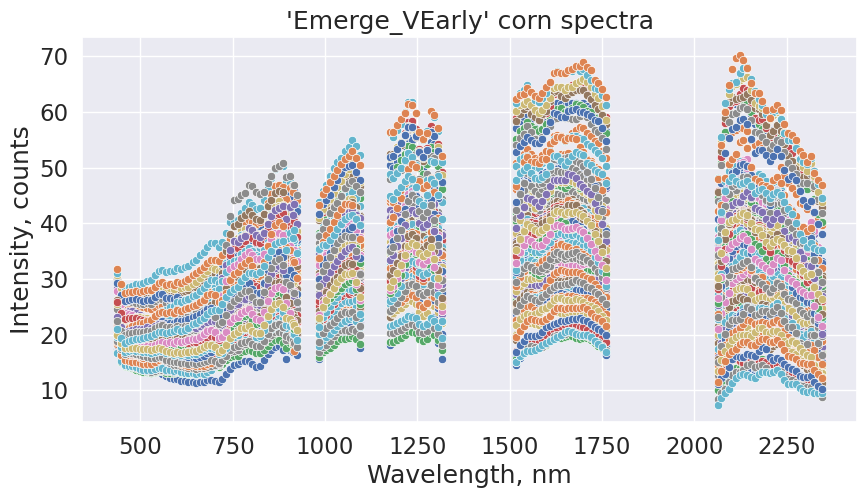

In [36]:
# plot 'Emerge_VEarly' corn spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Emerge_VEarly' corn spectra")

for i in df_corn[df_corn["Stage"] == 'Emerge_VEarly'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')   

5.695717096328735  s


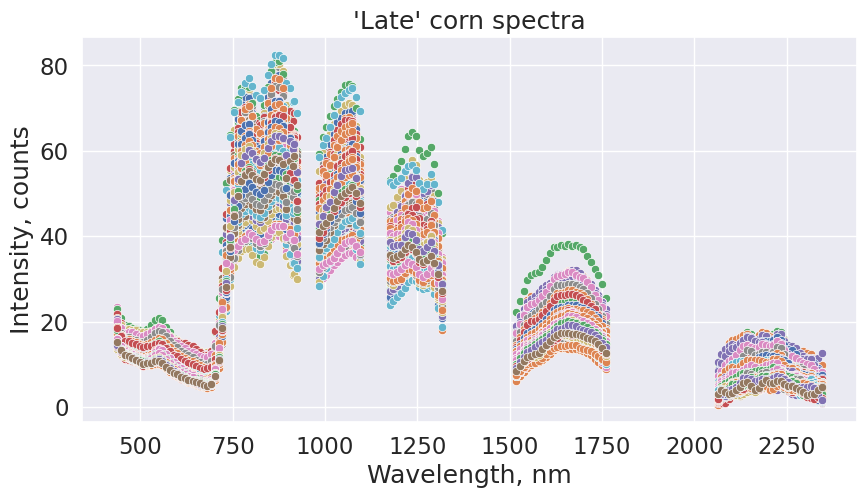

In [37]:
# plot 'Late' corn spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Late' corn spectra")

for i in df_corn[df_corn["Stage"] == 'Late'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')   

4.124019145965576  s


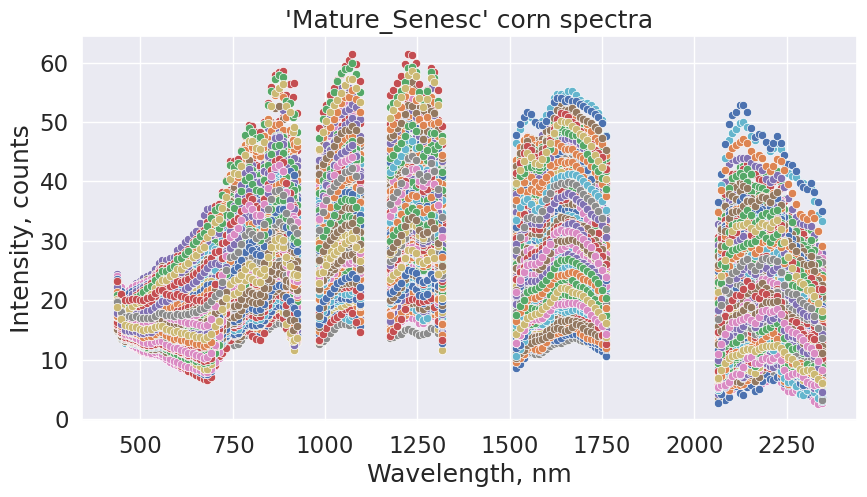

In [38]:
# plot 'Mature_Senesc' corn spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Mature_Senesc' corn spectra")

for i in df_corn[df_corn["Stage"] == 'Mature_Senesc'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')  



1.7930829524993896  s


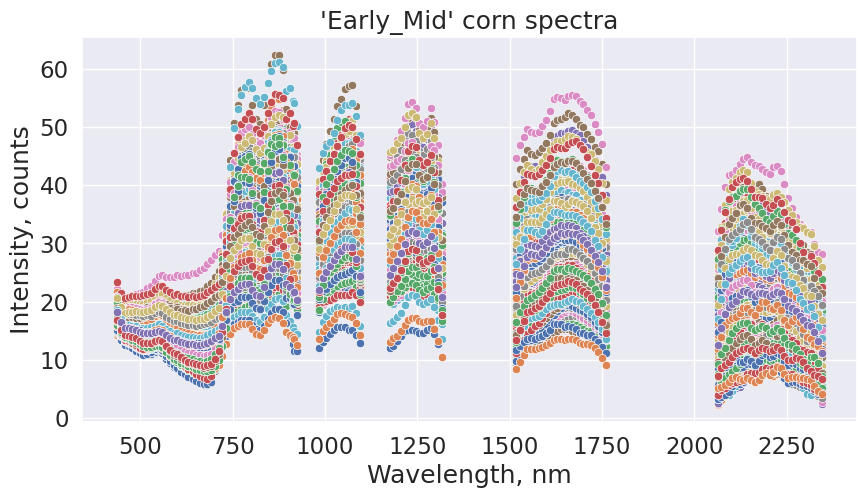

In [39]:
# plot 'Early_Mid' corn spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Early_Mid' corn spectra")

for i in df_corn[df_corn["Stage"] == 'Early_Mid'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')  

In [40]:
# min max normalization
spectra_n = spectra.copy()
for c in spectra_n.columns:
    if c!= 'Wavelength, nm':
        spectra_n[c]-= spectra_n[c].min()
        spectra_n[c]/= spectra_n[c].max()

In [41]:
df1 = spectra_n.drop(columns = "Wavelength, nm")
df1 = df1.transpose()

df1.head()
df1["Stage"] = df_corn["Stage"]

df1.head()

X437      X447      X457      X468      X478      X488      X498  \
0   0.366970  0.314772  0.279900  0.269946  0.261095  0.252226  0.241375   
1   0.317295  0.269094  0.243433  0.237430  0.230098  0.223757  0.216182   
2   0.249521  0.218341  0.201292  0.201347  0.197132  0.190310  0.182626   
3   0.347122  0.305369  0.281502  0.278932  0.270307  0.263755  0.257860   
19  0.353247  0.294625  0.263849  0.258727  0.256457  0.249947  0.245432   

        X508      X518      X529  ...     X2264     X2274     X2285     X2295  \
0   0.237443  0.244043  0.253771  ...  0.067468  0.072207  0.058642  0.049542   
1   0.214997  0.221686  0.231920  ...  0.085377  0.091545  0.080223  0.074126   
2   0.179482  0.183008  0.187949  ...  0.045025  0.042750  0.042090  0.038827   
3   0.255915  0.263210  0.273627  ...  0.075004  0.072417  0.063740  0.066742   
19  0.245989  0.255641  0.266399  ...  0.067467  0.076676  0.066323  0.052760   

       X2305     X2315     X2325     X2335     X2345     Stage  
0   0.033350  0.031650  0.017264  0.008698  0.000000  Critical  
1   0.063190  0.058099  0.041649  0.022738  0.000000  Critical  
2   0.024015  0.018887  0.018607  0.015615  0.000000  Critical  
3   0.068968  0.084628  0.085148  0.073196  0.054218  Critical  
19  0.028554  0.028625  0.024196  0.029571  0.000000  Critical  

[5 rows x 132 columns]

In [42]:
#machine learning

In [43]:
X = df1[wl_list]

In [44]:
y = df1["Stage"]

In [45]:
X = StandardScaler().fit_transform(X)

In [46]:
pca = PCA(n_components=2)

In [47]:
pc = pca.fit_transform(X)

In [48]:
df_pc = pd.DataFrame(data = pc, columns = ['PC 1', 'PC 2'])

In [49]:
df_pc = pd.concat([df_pc, y.reset_index()], axis = 1)
df_pc.drop(columns = 'index', inplace = True)

In [50]:
df_pc["Stage"].unique()

array(['Critical', 'Harvest', 'Emerge_VEarly', 'Late', 'Mature_Senesc',
       'Early_Mid'], dtype=object)

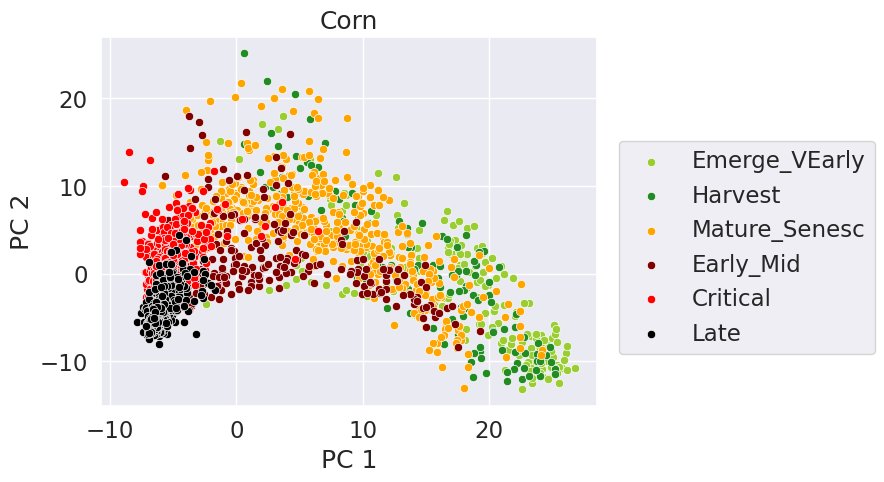

In [51]:
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Emerge_VEarly'], x = "PC 1", y = 'PC 2', color = 'yellowgreen', label = 'Emerge_VEarly')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Harvest'], x = "PC 1", y = 'PC 2', color = 'forestgreen', label = 'Harvest')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Mature_Senesc'], x = "PC 1", y = 'PC 2', color = 'orange', label = 'Mature_Senesc')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Early_Mid'], x = "PC 1", y = 'PC 2', color = 'maroon', label = 'Early_Mid')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Critical'], x = "PC 1", y = 'PC 2', color = 'red', label = 'Critical')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Late'], x = "PC 1", y = 'PC 2', color = 'black', label = 'Late')
plt.title("Corn")
plt.legend(bbox_to_anchor=(1.02, 0.75))

# Rice

In [52]:
# rice
df_rice = df[df["Crop"] == 'rice']
df_rice.shape[0]

116

In [53]:
df_rice["Stage"].unique()

array(['Early_Mid', 'Late'], dtype=object)

In [54]:
spectra = df_rice[wl_list].transpose()
spectra["Wavelength, nm"] = wl

0.708956241607666  s


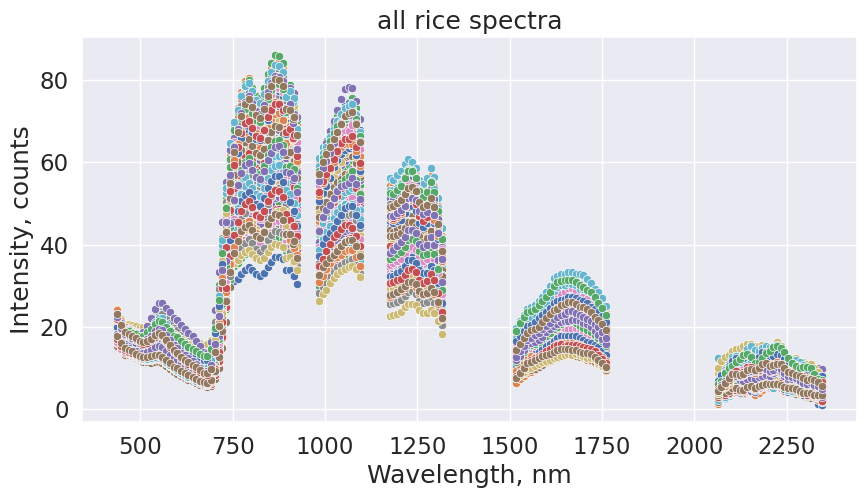

In [55]:
# plot all rice spectra

tic = time.time()
plt.figure(figsize = (10,5))
plt.title("all rice spectra")

for i in df_rice.index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')

0.4090461730957031  s


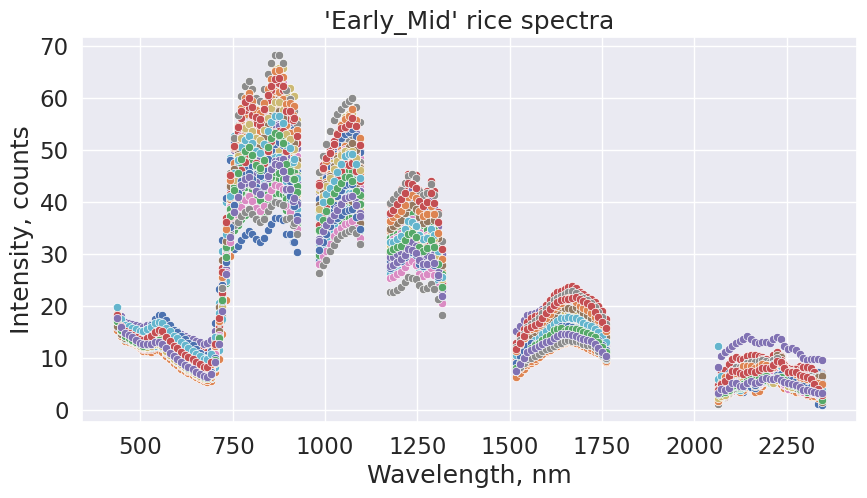

In [56]:
# plot 'Early_Mid' rice spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Early_Mid' rice spectra")

for i in df_rice[df_rice["Stage"] == 'Early_Mid'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s') 

0.3409292697906494  s


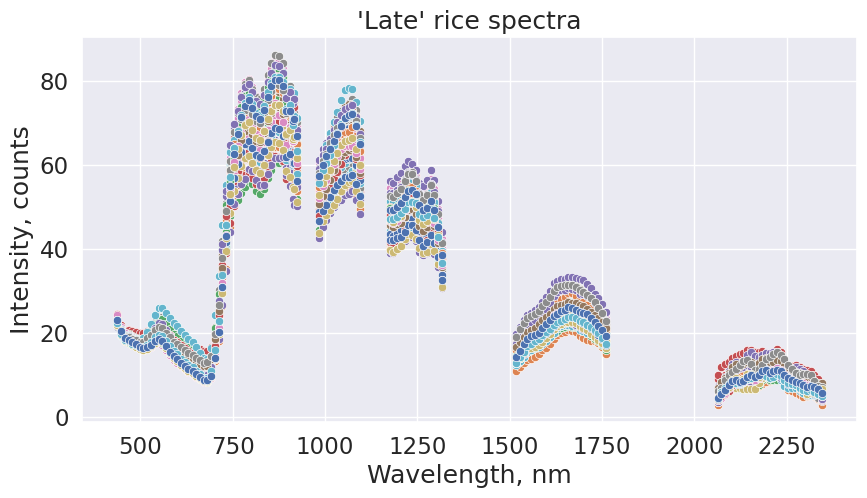

In [57]:
# plot 'Late' rice spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Late' rice spectra")

for i in df_rice[df_rice["Stage"] == 'Late'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')  

In [58]:
# min max normalization
spectra_n = spectra.copy()
for c in spectra_n.columns:
    if c!= 'Wavelength, nm':
        spectra_n[c]-= spectra_n[c].min()
        spectra_n[c]/= spectra_n[c].max()

In [59]:
df1 = spectra_n.drop(columns = "Wavelength, nm")
df1 = df1.transpose()

df1.head()
df1["Stage"] = df_rice["Stage"]

df1.head()

X437      X447      X457      X468      X478      X488      X498  \
4  0.319463  0.279830  0.262316  0.255328  0.249080  0.240841  0.230209   
5  0.274545  0.244815  0.227888  0.224128  0.219533  0.211584  0.201828   
6  0.363379  0.310602  0.286494  0.288223  0.284345  0.273749  0.263367   
7  0.308833  0.267264  0.242325  0.235582  0.229784  0.223249  0.219353   
8  0.248485  0.217745  0.201145  0.195217  0.189977  0.184340  0.177542   

       X508      X518      X529  ...     X2264     X2274     X2285     X2295  \
4  0.223247  0.222402  0.224652  ...  0.076409  0.075745  0.080256  0.090067   
5  0.197613  0.201542  0.207050  ...  0.045487  0.045964  0.039232  0.036309   
6  0.258822  0.266363  0.274526  ...  0.050888  0.046396  0.034443  0.035361   
7  0.213282  0.218689  0.223978  ...  0.037503  0.054431  0.065541  0.059615   
8  0.175818  0.180325  0.188019  ...  0.057015  0.060548  0.049764  0.049175   

      X2305     X2315     X2325     X2335     X2345      Stage  
4  0.095541  0.072482  0.038771  0.004568  0.000000  Early_Mid  
5  0.035800  0.032876  0.026175  0.011526  0.000000  Early_Mid  
6  0.037839  0.049565  0.045901  0.029951  0.007147  Early_Mid  
7  0.034827  0.017753  0.008559  0.018996  0.033420  Early_Mid  
8  0.050394  0.052054  0.044285  0.025293  0.009139  Early_Mid  

[5 rows x 132 columns]

In [60]:
#machine learning

In [61]:
X = df1[wl_list]

In [62]:
y = df1["Stage"]

In [63]:
X = StandardScaler().fit_transform(X)

In [64]:
pca = PCA(n_components=2)

In [65]:
pc = pca.fit_transform(X)

In [66]:
df_pc = pd.DataFrame(data = pc, columns = ['PC 1', 'PC 2'])

In [67]:
df_pc = pd.concat([df_pc, y.reset_index()], axis = 1)
df_pc.drop(columns = 'index', inplace = True)

In [68]:
df_pc["Stage"].unique()

array(['Early_Mid', 'Late'], dtype=object)

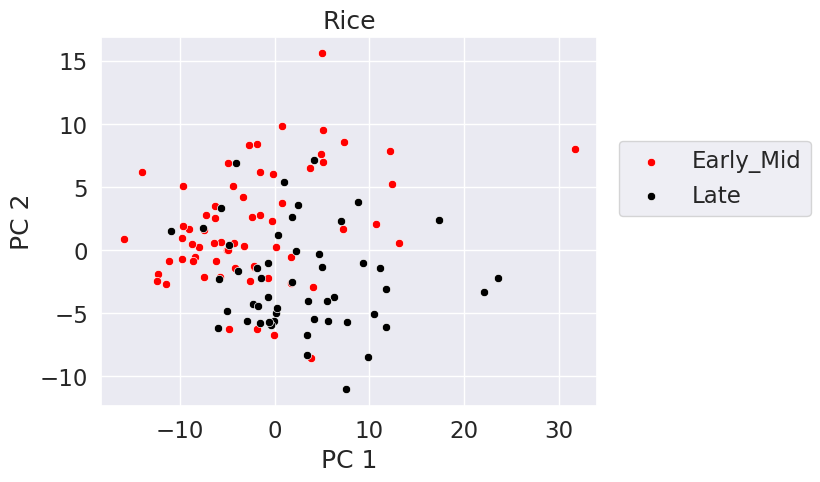

In [69]:
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Early_Mid'], x = "PC 1", y = 'PC 2', color = 'red', label = 'Early_Mid')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Late'], x = "PC 1", y = 'PC 2', color = 'black', label = 'Late')
plt.title("Rice")
plt.legend(bbox_to_anchor=(1.02, 0.75))

# Cotton

In [70]:
# cotton
df_cotton = df[df["Crop"] == 'cotton']
df_cotton.shape[0]

823

In [71]:
df_cotton["Stage"].unique()

array(['Mature_Senesc', 'Harvest', 'Emerge_VEarly', 'Early_Mid',
       'Critical'], dtype=object)

In [72]:
spectra = df_cotton[wl_list].transpose()
spectra["Wavelength, nm"] = wl

6.699860334396362  s


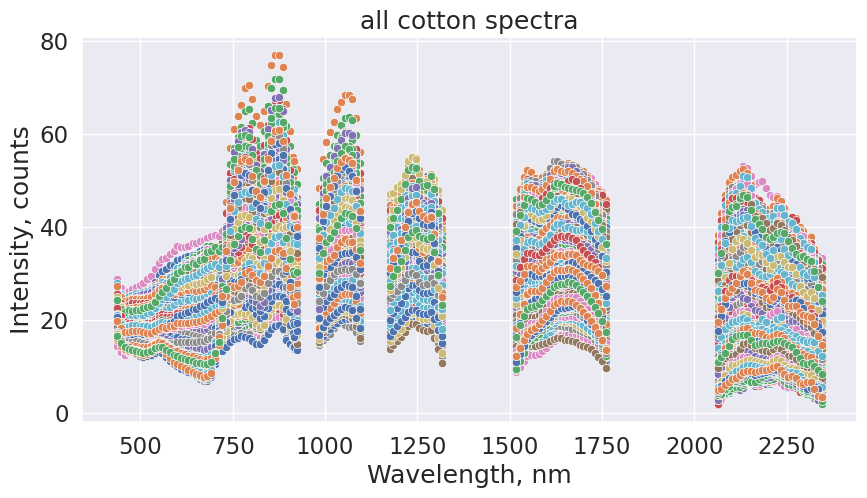

In [73]:
# plot all cotton spectra

tic = time.time()
plt.figure(figsize = (10,5))
plt.title("all cotton spectra")

for i in df_cotton.index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')

0.5129523277282715  s


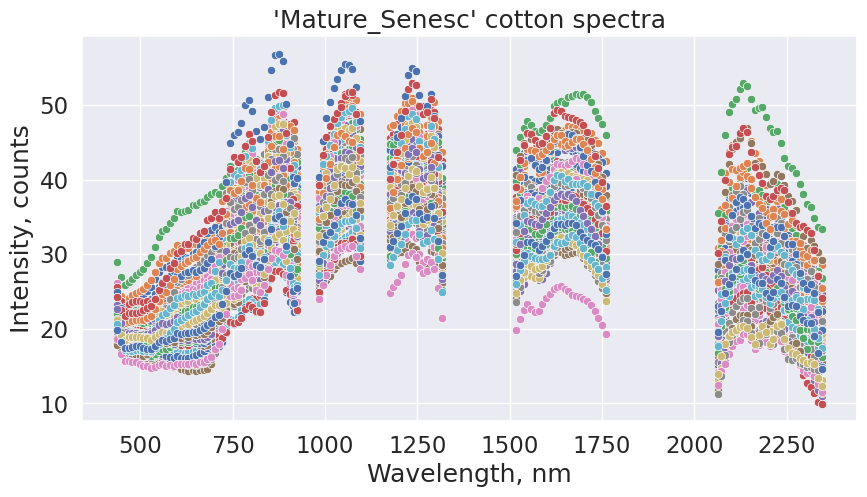

In [74]:
# plot 'Mature_Senesc' corn spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Mature_Senesc' cotton spectra")

for i in df_cotton[df_cotton["Stage"] == 'Mature_Senesc'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')  


0.1616823673248291  s


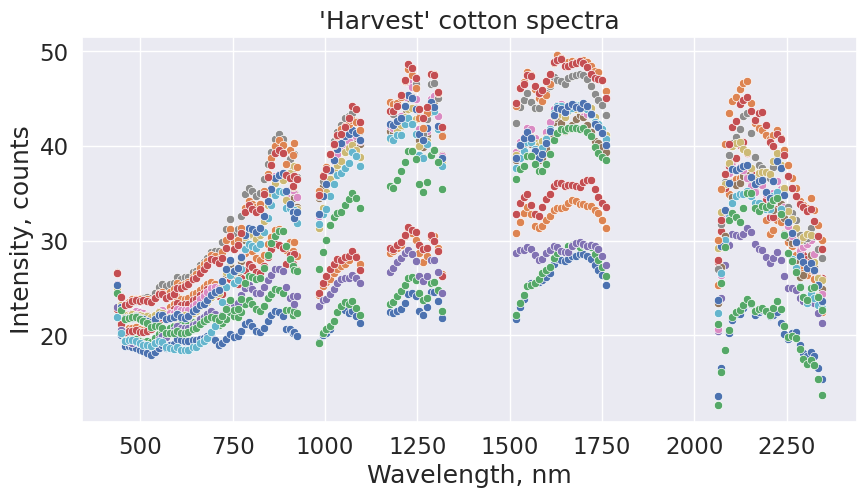

In [75]:
# plot 'Harvest' corn spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Harvest' cotton spectra")

for i in df_cotton[df_cotton["Stage"] == 'Harvest'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')  

1.6008265018463135  s


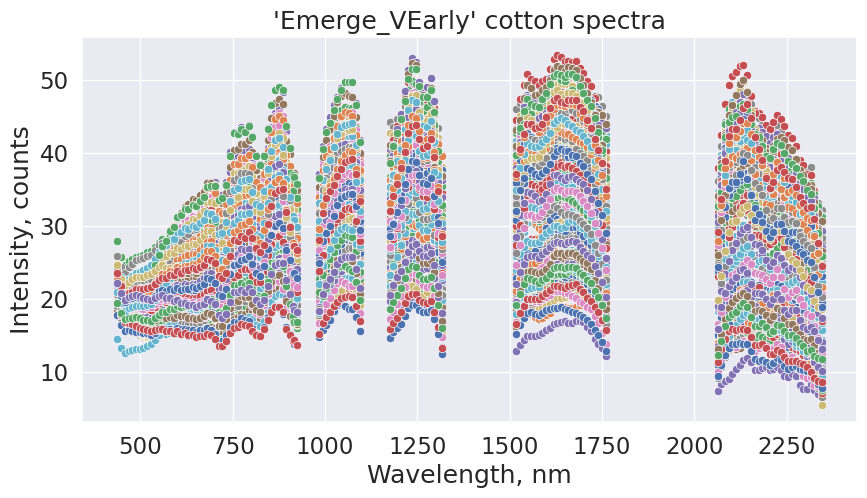

In [76]:
# plot 'Emerge_VEarly' corn spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Emerge_VEarly' cotton spectra")

for i in df_cotton[df_cotton["Stage"] == 'Emerge_VEarly'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')  


2.1691253185272217  s


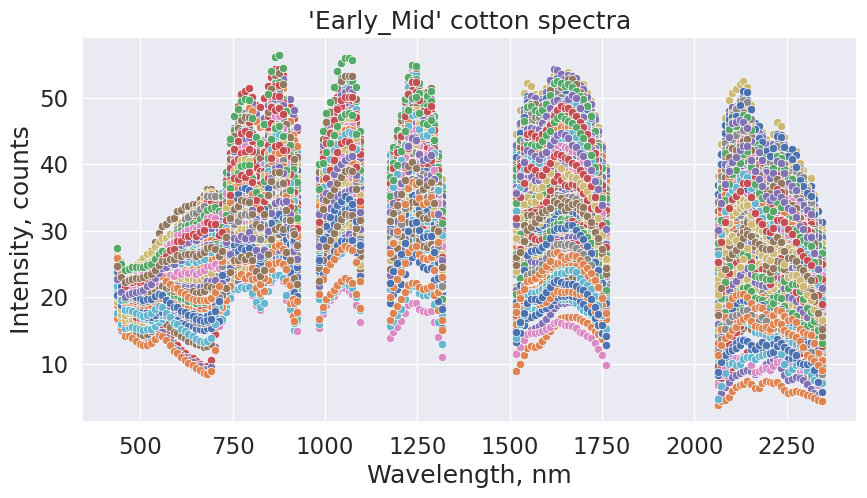

In [77]:
# plot 'Early_Mid' corn spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Early_Mid' cotton spectra")

for i in df_cotton[df_cotton["Stage"] == 'Early_Mid'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s') 

1.608067512512207  s


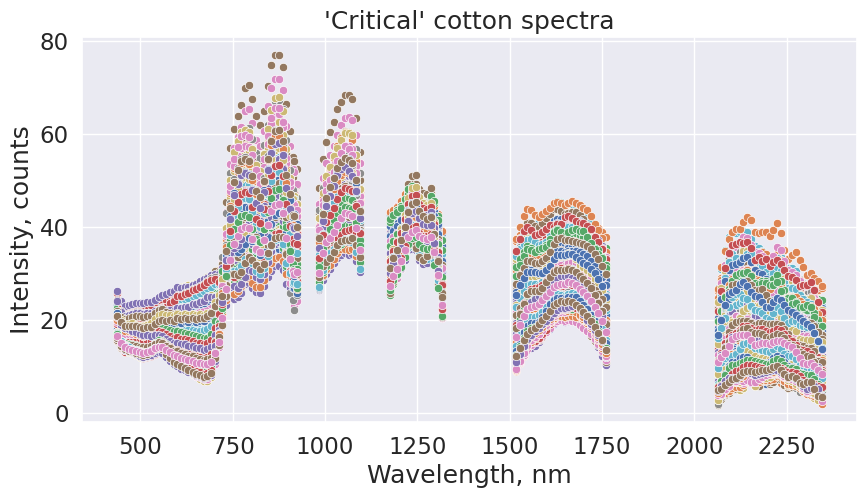

In [78]:
# plot 'Critical' corn spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Critical' cotton spectra")

for i in df_cotton[df_cotton["Stage"] == 'Critical'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s') 



In [79]:
# min max normalization
spectra_n = spectra.copy()
for c in spectra_n.columns:
    if c!= 'Wavelength, nm':
        spectra_n[c]-= spectra_n[c].min()
        spectra_n[c]/= spectra_n[c].max()

In [80]:
df1 = spectra_n.drop(columns = "Wavelength, nm")
df1 = df1.transpose()

df1.head()
df1["Stage"] = df_cotton["Stage"]

df1.head()

X437      X447      X457      X468      X478      X488      X498  \
36  0.144476  0.049117  0.000000  0.018545  0.030657  0.046382  0.054561   
37  0.553563  0.425548  0.352232  0.351760  0.346951  0.337438  0.323799   
38  0.145884  0.061046  0.000000  0.020617  0.023782  0.027175  0.017322   
39  0.594200  0.472248  0.410732  0.411419  0.414474  0.409816  0.400572   
40  0.121423  0.043912  0.000936  0.008253  0.008838  0.012053  0.002387   

        X508      X518      X529  ...     X2264     X2274     X2285     X2295  \
36  0.069320  0.094937  0.117626  ...  0.391769  0.356362  0.272336  0.206960   
37  0.312617  0.301337  0.289732  ...  0.444257  0.446088  0.361210  0.301927   
38  0.009317  0.017168  0.022318  ...  0.549057  0.492543  0.408564  0.372433   
39  0.393866  0.396982  0.393432  ...  0.428405  0.415137  0.347267  0.285273   
40  0.000000  0.006335  0.015517  ...  0.538265  0.502670  0.452701  0.405577   

       X2305     X2315     X2325     X2335     X2345          Stage  
36  0.183495  0.235086  0.223546  0.208907  0.164969  Mature_Senesc  
37  0.282940  0.311859  0.278530  0.198128  0.119988        Harvest  
38  0.360040  0.395640  0.334991  0.226329  0.125002        Harvest  
39  0.254926  0.278219  0.248507  0.162051  0.061709        Harvest  
40  0.382848  0.378741  0.324288  0.286631  0.283735        Harvest  

[5 rows x 132 columns]

In [81]:
#machine learning

In [82]:
X = df1[wl_list]

In [83]:
y = df1["Stage"]

In [84]:
X = StandardScaler().fit_transform(X)

In [85]:
pca = PCA(n_components=2)

In [86]:
pc = pca.fit_transform(X)

In [87]:
df_pc = pd.DataFrame(data = pc, columns = ['PC 1', 'PC 2'])

In [88]:
df_pc = pd.concat([df_pc, y.reset_index()], axis = 1)
df_pc.drop(columns = 'index', inplace = True)

In [89]:
df_pc["Stage"].unique()

array(['Mature_Senesc', 'Harvest', 'Emerge_VEarly', 'Early_Mid',
       'Critical'], dtype=object)

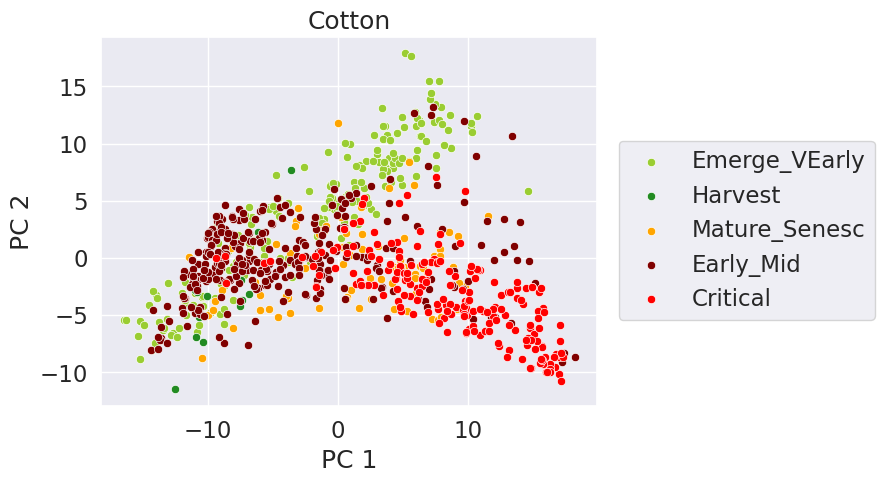

In [90]:
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Emerge_VEarly'], x = "PC 1", y = 'PC 2', color = 'yellowgreen', label = 'Emerge_VEarly')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Harvest'], x = "PC 1", y = 'PC 2', color = 'forestgreen', label = 'Harvest')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Mature_Senesc'], x = "PC 1", y = 'PC 2', color = 'orange', label = 'Mature_Senesc')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Early_Mid'], x = "PC 1", y = 'PC 2', color = 'maroon', label = 'Early_Mid')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Critical'], x = "PC 1", y = 'PC 2', color = 'red', label = 'Critical')
plt.title("Cotton")
plt.legend(bbox_to_anchor=(1.02, 0.75))

# Soybean

In [91]:
# cotton
df_soybean = df[df["Crop"] == 'soybean']
df_soybean.shape[0]

2086

In [92]:
df_soybean["Stage"].unique()

array(['Critical', 'Mature_Senesc', 'Harvest', 'Emerge_VEarly',
       'Early_Mid', 'Late'], dtype=object)

In [93]:
spectra = df_soybean[wl_list].transpose()
spectra["Wavelength, nm"] = wl

24.097104787826538  s


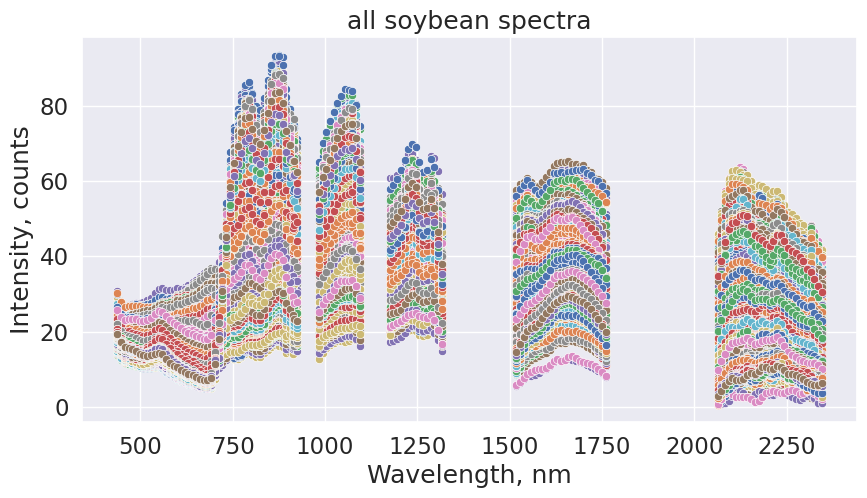

In [94]:
# plot all soybean spectra

tic = time.time()
plt.figure(figsize = (10,5))
plt.title("all soybean spectra")

for i in df_soybean.index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')

6.504148483276367  s


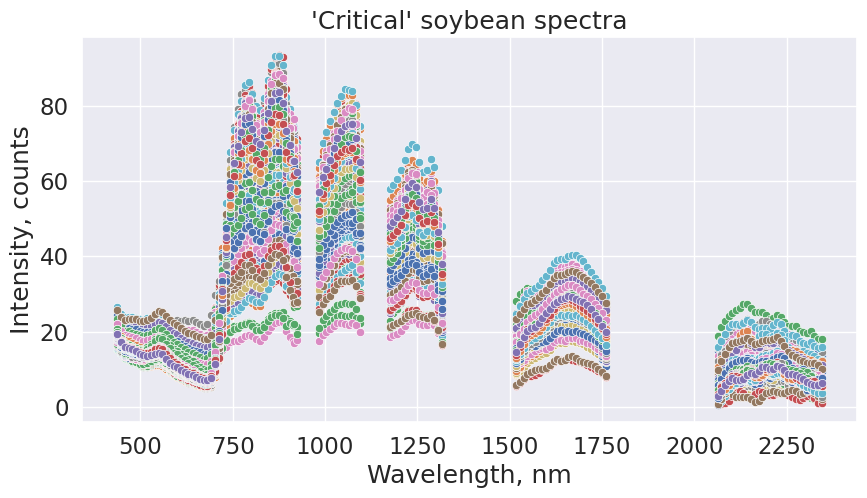

In [95]:
# plot 'Critical' soybean spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Critical' soybean spectra")

for i in df_soybean[df_soybean["Stage"] == 'Critical'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s') 

1.272456407546997  s


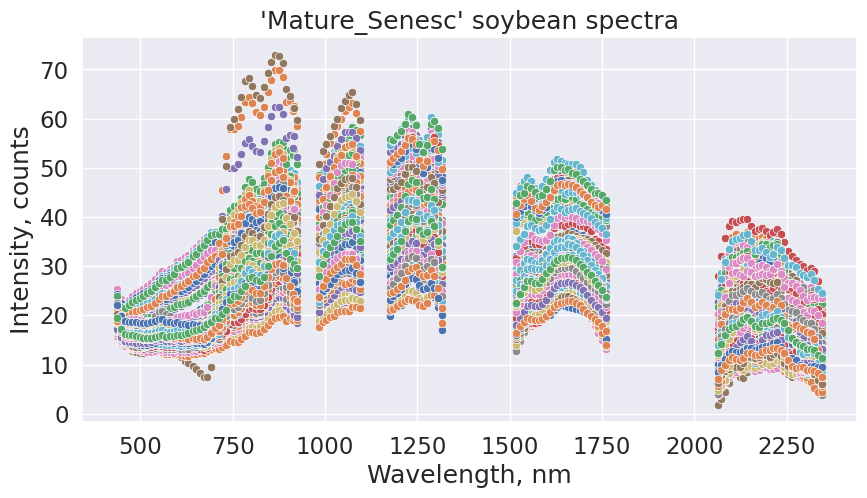

In [96]:
# plot 'Mature_Senesc' soybean spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Mature_Senesc' soybean spectra")

for i in df_soybean[df_soybean["Stage"] == 'Mature_Senesc'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s') 

0.5167543888092041  s


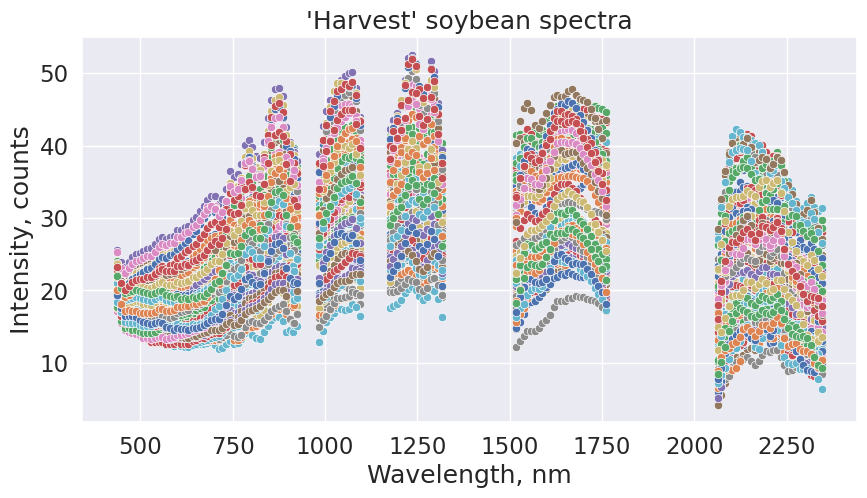

In [97]:
# plot 'Harvest' soybean spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Harvest' soybean spectra")

for i in df_soybean[df_soybean["Stage"] == 'Harvest'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s') 

0.8233852386474609  s


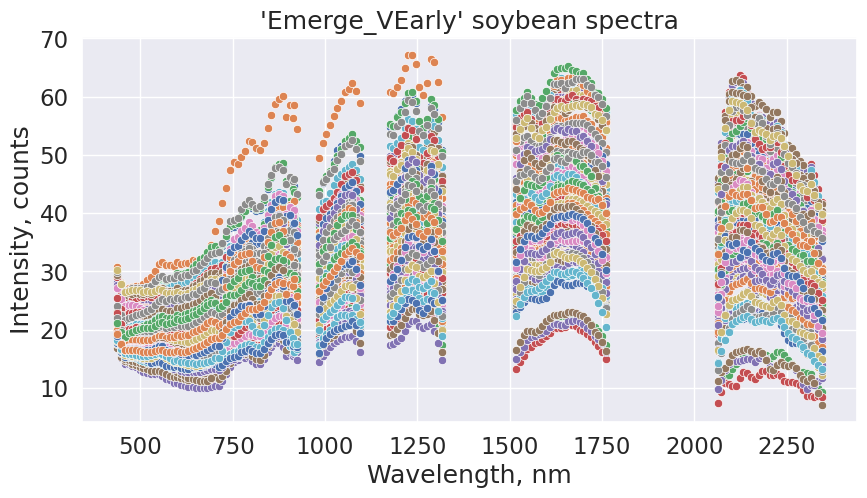

In [98]:
# plot 'Emerge_VEarly' soybean spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Emerge_VEarly' soybean spectra")

for i in df_soybean[df_soybean["Stage"] == 'Emerge_VEarly'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s') 

4.522155046463013  s


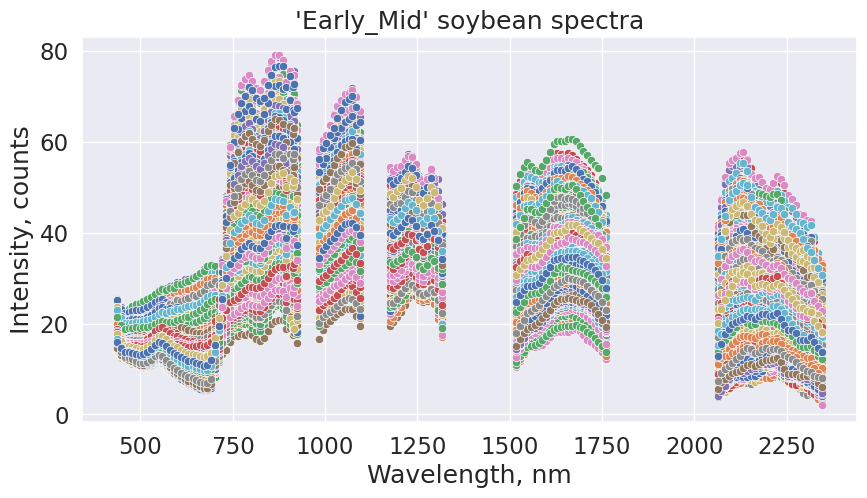

In [99]:
# plot 'Early_Mid' soybean spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Early_Mid' soybean spectra")

for i in df_soybean[df_soybean["Stage"] == 'Early_Mid'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')

1.868894100189209  s


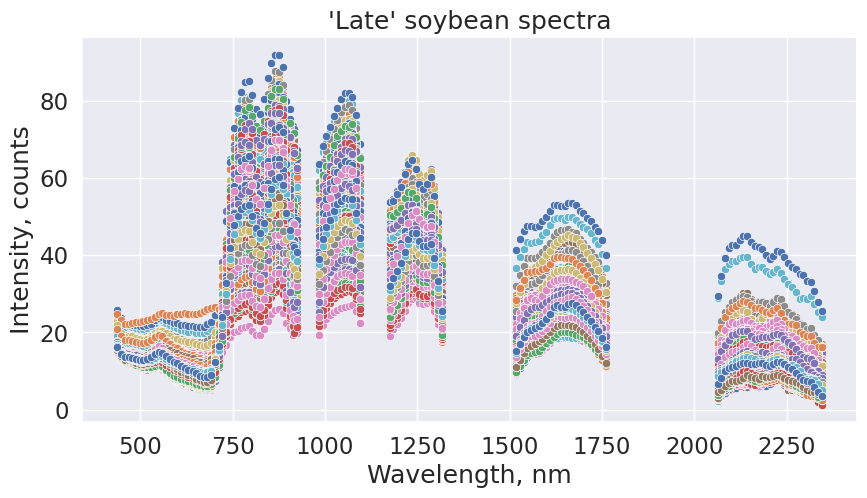

In [100]:
# plot 'Late' soybean spectra

tic = time.time()

plt.figure(figsize = (10,5))
plt.title("'Late' soybean spectra")

for i in df_soybean[df_soybean["Stage"] == 'Late'].index:
    
    df_plot = pd.DataFrame([])
    df_plot["Wavelength, nm"] = spectra["Wavelength, nm"]
    df_plot["Intensity, counts"] = spectra[i]
    sns.scatterplot(df_plot, x = "Wavelength, nm", y = "Intensity, counts")

toc = time.time()
print(toc - tic , ' s')

In [101]:
# min max normalization
spectra_n = spectra.copy()
for c in spectra_n.columns:
    if c!= 'Wavelength, nm':
        spectra_n[c]-= spectra_n[c].min()
        spectra_n[c]/= spectra_n[c].max()

In [102]:
df1 = spectra_n.drop(columns = "Wavelength, nm")
df1 = df1.transpose()

df1.head()
df1["Stage"] = df_soybean["Stage"]

df1.head()

X437      X447      X457      X468      X478      X488      X498  \
64  0.236605  0.201856  0.183230  0.181582  0.179329  0.176875  0.173794   
65  0.197153  0.165007  0.147140  0.141915  0.136782  0.131624  0.126216   
66  0.246713  0.217811  0.198745  0.191525  0.187812  0.183475  0.178294   
67  0.301685  0.246877  0.208497  0.203234  0.194401  0.187740  0.180021   
68  0.255542  0.217998  0.198699  0.194196  0.189303  0.185425  0.183248   

        X508      X518      X529  ...     X2264     X2274     X2285     X2295  \
64  0.175808  0.189015  0.206052  ...  0.124731  0.123547  0.117357  0.119789   
65  0.126727  0.137863  0.152817  ...  0.076232  0.062442  0.052033  0.043890   
66  0.177444  0.185496  0.195958  ...  0.085020  0.082497  0.075534  0.075683   
67  0.180164  0.194441  0.209488  ...  0.159097  0.144155  0.092182  0.061296   
68  0.192202  0.211875  0.238311  ...  0.079005  0.074445  0.070692  0.072424   

       X2305     X2315     X2325     X2335    X2345     Stage  
64  0.118267  0.109290  0.075137  0.030646  0.00000  Critical  
65  0.040583  0.039746  0.032433  0.018029  0.00000  Critical  
66  0.074758  0.069691  0.053163  0.041862  0.05869  Critical  
67  0.047772  0.057195  0.036011  0.011585  0.00000  Critical  
68  0.062799  0.056209  0.045267  0.025533  0.00000  Critical  

[5 rows x 132 columns]

In [103]:
#machine learning

In [104]:
X = df1[wl_list]

In [105]:
y = df1["Stage"]

In [106]:
X = StandardScaler().fit_transform(X)

In [107]:
pca = PCA(n_components=2)

In [108]:
pc = pca.fit_transform(X)

In [109]:
df_pc = pd.DataFrame(data = pc, columns = ['PC 1', 'PC 2'])

In [110]:
df_pc = pd.concat([df_pc, y.reset_index()], axis = 1)
df_pc.drop(columns = 'index', inplace = True)

In [111]:
df_pc["Stage"].unique()

array(['Critical', 'Mature_Senesc', 'Harvest', 'Emerge_VEarly',
       'Early_Mid', 'Late'], dtype=object)

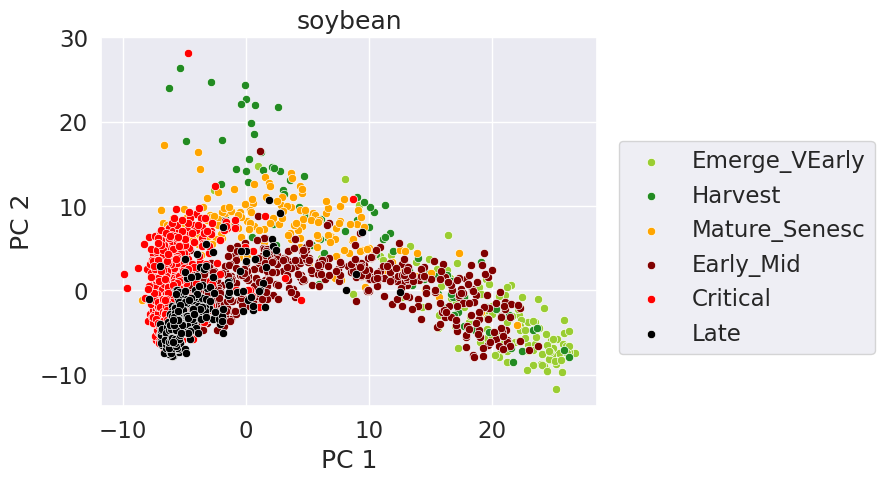

In [112]:
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Emerge_VEarly'], x = "PC 1", y = 'PC 2', color = 'yellowgreen', label = 'Emerge_VEarly')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Harvest'], x = "PC 1", y = 'PC 2', color = 'forestgreen', label = 'Harvest')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Mature_Senesc'], x = "PC 1", y = 'PC 2', color = 'orange', label = 'Mature_Senesc')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Early_Mid'], x = "PC 1", y = 'PC 2', color = 'maroon', label = 'Early_Mid')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Critical'], x = "PC 1", y = 'PC 2', color = 'red', label = 'Critical')
sns.scatterplot(data = df_pc[df_pc["Stage"] == 'Late'], x = "PC 1", y = 'PC 2', color = 'black', label = 'Late')
plt.title("soybean")
plt.legend(bbox_to_anchor=(1.02, 0.75))